In [1]:
import matplotlib.pyplot as plt

In [2]:
#Load
file_name = "lstm_hid8_output_small.pkl"

import pickle
log = pickle.load( open('saves/outputs/'+file_name, 'rb'))

In [3]:
#ESOD

import math
esod = 0
for i in range (0, len(log)):
    pred = log[i][0]
    y = log[i][1]

    esod_pred = 0
    esod_y = 0
    for j in range(2, len(pred)):
        esod_pred += math.pow((pred[j] - 2*pred[j-1] + pred[j-2]), 2)
        esod_y += math.pow((y[j] - 2*y[j-1] + y[j-2]), 2)
    if (esod_y != 0):
        esod += esod_pred / esod_y

print("avg ESOD:", esod/len(log))

avg ESOD: 0.05431980668477733


C:\Users\jakub\AppData\Local\Temp/ipykernel_1564/2159884648.py:23: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax.plot([0, 600 ], [0, 600], 'k--', color="white")


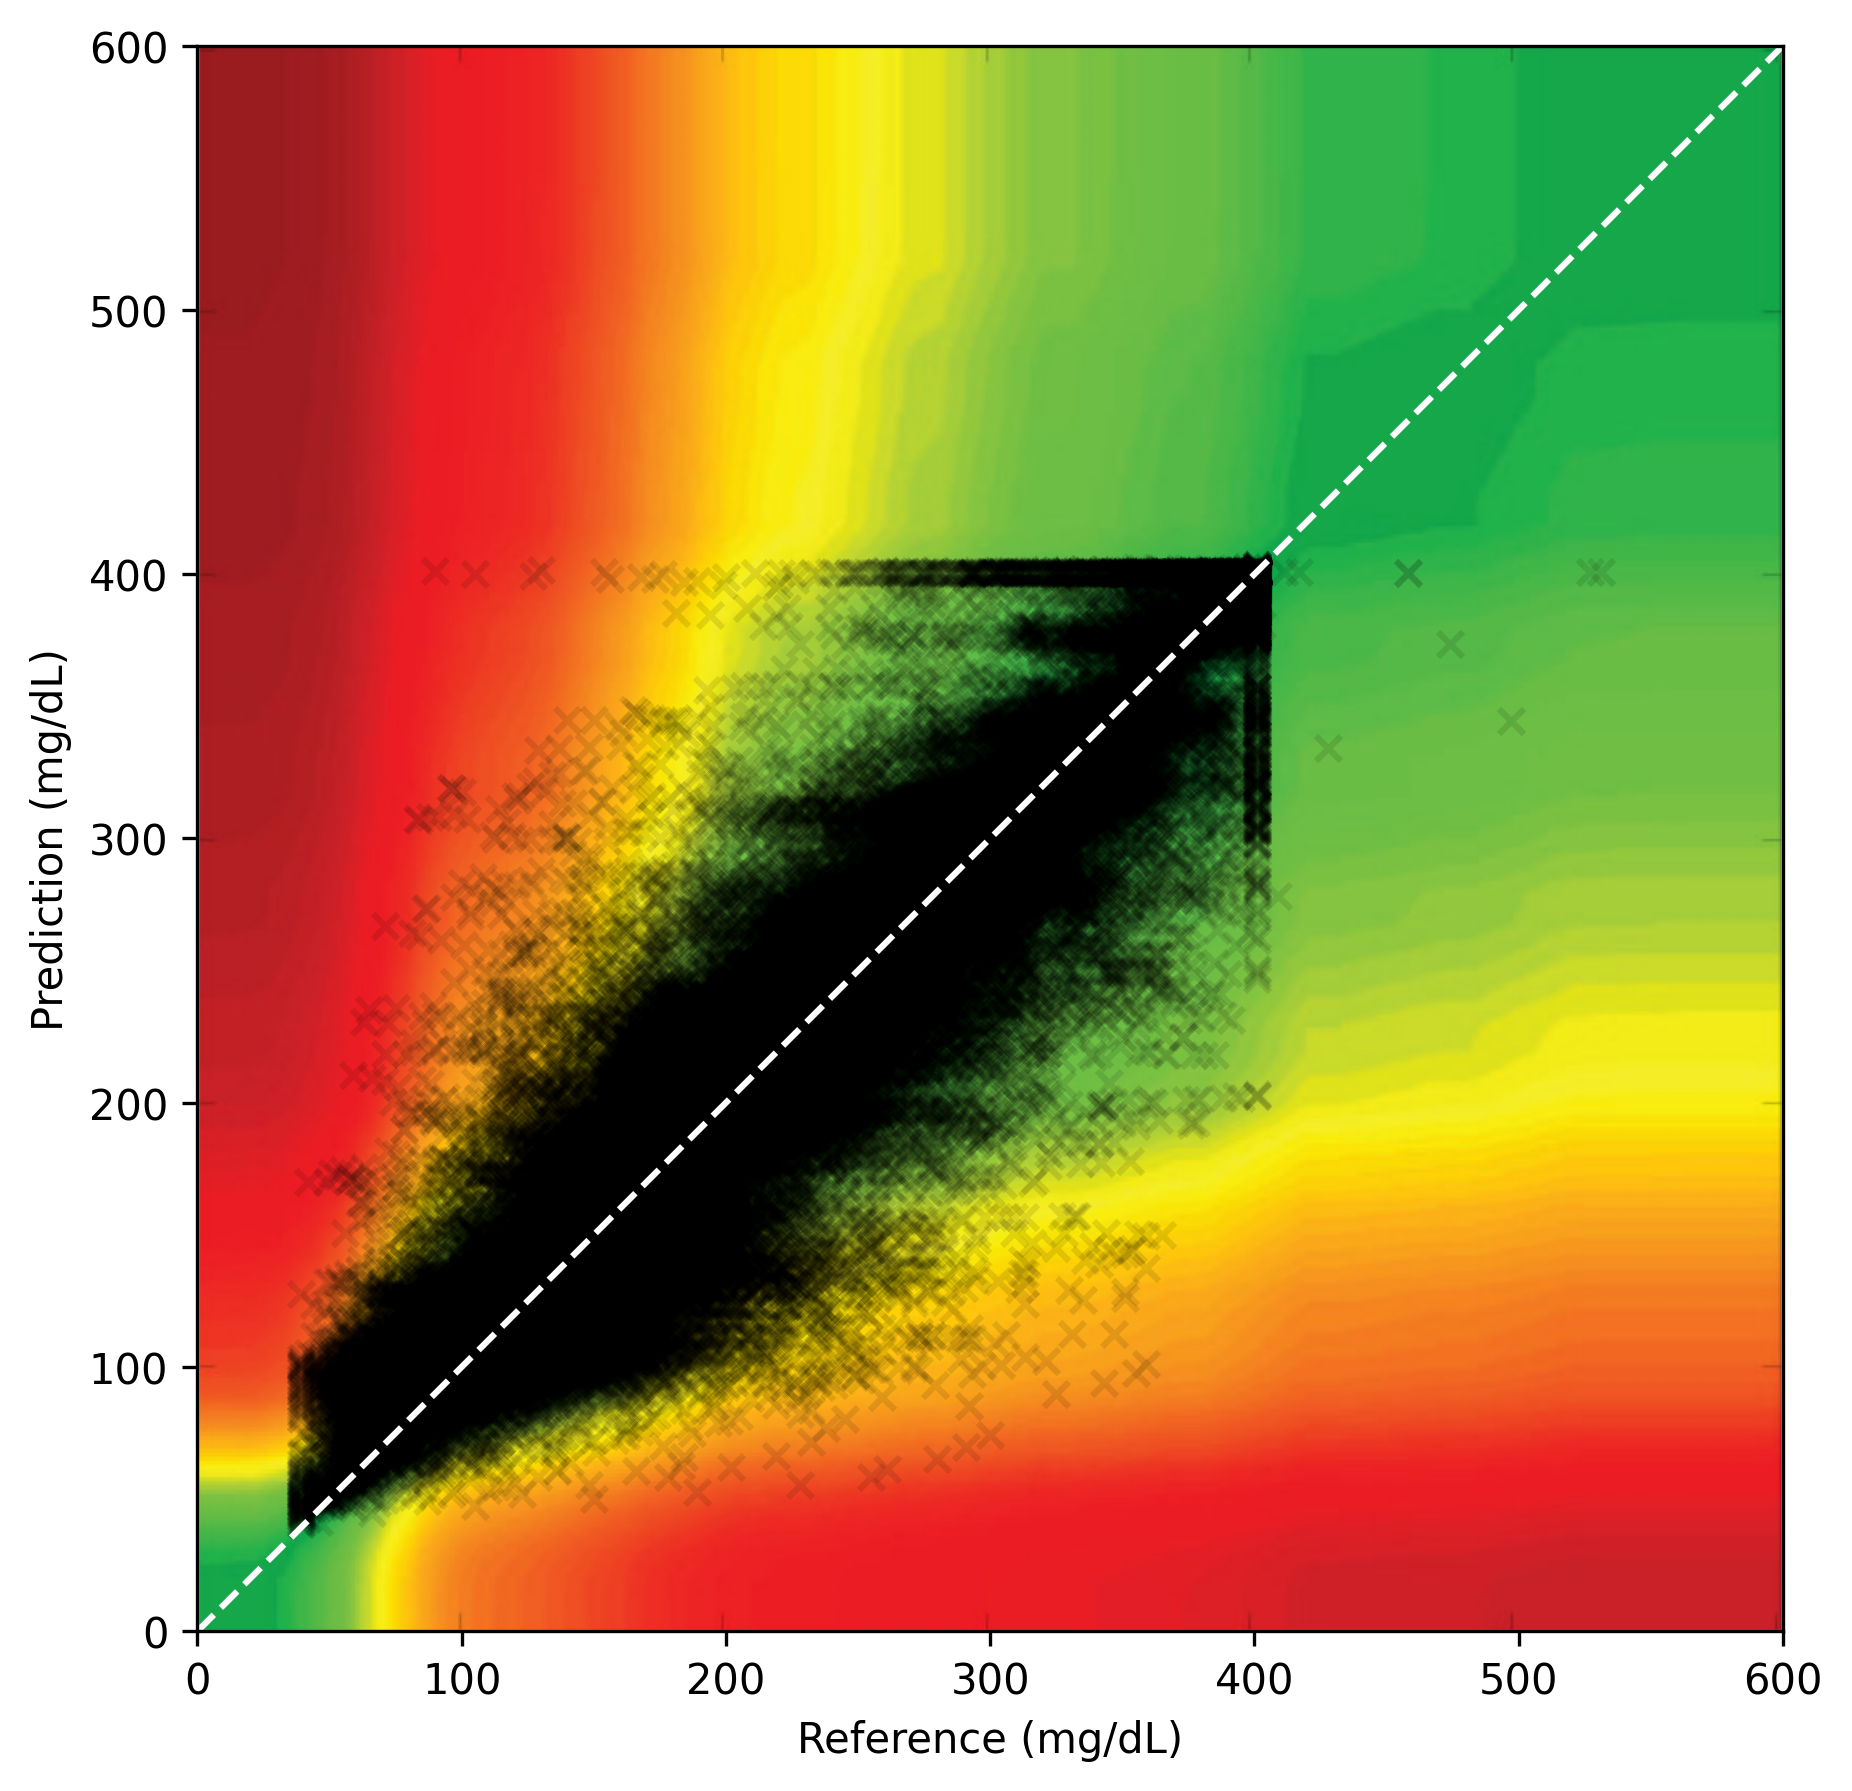

In [26]:
#Clarke Error Grid Analysis (EGA)

xs = []
ys = []

for i in range (0, len(log)):
    pred = log[i][0]
    y = log[i][1]

    xs.extend(y)
    ys.extend(pred)

fig, ax = plt.subplots()
plt.ylabel("Prediction (mg/dL)")
plt.xlabel("Reference (mg/dL)")
plt.rcParams["figure.figsize"] = (7,7)
plt.gcf().set_dpi(300)

img = plt.imread("C:/Users/jakub/Documents/DATA/Indv_proj/graphs/surveillance-error-grid.png")
ax.imshow(img, extent=[0, 600, 0, 600])

ax.scatter(xs, ys, alpha=0.1, marker='x', color='black')
ax.plot([0, 600 ], [0, 600], 'k--', color="white")

In [ ]:
#Classify Outcome

hyper_thres = 280
hypo_thres = 70


cs_diff = []
true_pos, true_neg, false_pos, false_neg = 0, 0, 0, 0
for i in range (0, len(xs)):
    pred = ys[i]
    y = xs[i]

    c_pred = 0
    c_y = 0

    #TODO check Thresholds
    if (pred > hyper_thres):
        c_pred = 1
    elif (pred < hypo_thres):
        c_pred = -1
    else:
        c_pred = 0

    if (y > hyper_thres):
        c_y = 1
    elif (y < hypo_thres):
        c_y = -1
    else:
        c_y = 0


    if (c_y == 1 or c_y == -1) and c_pred == c_y :
        true_pos += 1
    elif (c_y == 1 or c_y == -1) and c_pred == 0 :
        true_neg += 1
    elif c_y == 0 and (c_pred == 1 or c_pred == -1)  :
        false_pos += 1
    elif (c_pred == 1 and c_y == -1) or (c_y == 1 and c_pred == -1):
        true_neg += 1
    else:
        false_neg += 1

print("True Pos", true_pos)
print("True Neg", true_neg)
print("False Pos", false_pos)
print("False Neg", false_neg)
print(len(xs), true_pos+true_neg+false_pos+false_neg)

print("--"*10)

print("Precision", true_pos/(true_pos+false_pos) )
print("Recall", true_pos/(true_pos+false_neg) )
print("F1 score", true_pos/(true_pos+0.5*(false_pos + false_neg)) )


In [72]:

c_pred, c_y = -1, -1

true_pos, true_neg, false_pos, false_neg = 0, 0, 0, 0

if (c_y == 1 or c_y == -1) and c_pred == c_y :
    true_pos = 1
elif (c_y == 1 or c_y == -1) and c_pred == 0 :
    true_neg = 1
elif c_y == 0 and (c_pred == 1 or c_pred == -1)  :
    false_pos = 1
elif (c_pred == 1 and c_y == -1) or (c_y == 1 and c_pred == -1):
    true_neg = 1
else:
    false_neg = 1

print("True Pos", true_pos)
print("True Neg", true_neg)
print("False Pos", false_pos)
print("False Neg", false_neg)


True Pos 1
True Neg 0
False Pos 0
False Neg 0
